In [27]:
import pandas as pd
import matplotlib.pyplot as plt
interact=pd.read_csv('/Users/iangustov_tsm/Desktop/dataton/interactiondata.csv')
interact


,UserId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,0,0,0,0,0
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,1,1,0,1,0
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,0,0,0,0,0
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,0,0,1,1,1
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,0,0,0,0,0
3401,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,1,1,1,1,0
3402,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,0,0,0,0,0
3403,a0c31e08-22eb-4ca9-aeb8-9c0a37d7b224,0,2024-06-26,4,2,12,5,5,17,31,0,0,0,0,0


In [7]:
order=pd.read_csv('/Users/iangustov_tsm/Desktop/dataton/orderdata.csv')
order


,userId,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0
...,...,...,...
23830,b2fe4d90-5554-4273-8245-6555e7be1ce1,other,7.0
23831,a6b826f4-a5b3-47b7-ad47-e7a3aee228df,vegetables,0.0
23832,4c2661f2-dfaf-415c-b10b-d281bd0b481e,fruits,0.0
23833,74b3b32a-36a6-49c6-8ff0-3878fc2090ca,sweets,352.0


In [24]:
order_data_filtered = order[order['avg_bill'] > 0]

users_per_category = order_data_filtered.groupby('category')['userId'].nunique().reset_index()
total_unique_users = order_data_filtered['userId'].nunique()
users_per_category['percentage'] = (users_per_category['userId'] / total_unique_users) * 100
users_per_category.columns = ['Category', 'Unique Users', 'Percentage']

users_per_category

,Category,Unique Users,Percentage
0,alcohol,2302,67.606461
1,fish,2878,84.522761
2,fruits,3003,88.193833
3,meat,2289,67.224670
4,other,3351,98.414097
5,sweets,2976,87.400881
6,vegetables,2984,87.635830


In [5]:
usd=pd.read_csv('/Users/iangustov_tsm/Desktop/dataton/userdata.csv')
usd

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
2,d4810416-7e2a-4d1b-8440-30f39cd42aca,2022-11-14 12:31:05,13,25508.0,0,0,single,NaN
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters
...,...,...,...,...,...,...,...,...
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters
3403,0bc14633-7bcf-4ba6-be0f-8a85ab18c9e7,2024-01-27 13:56:22,62,109008.0,0,0,dating,phd


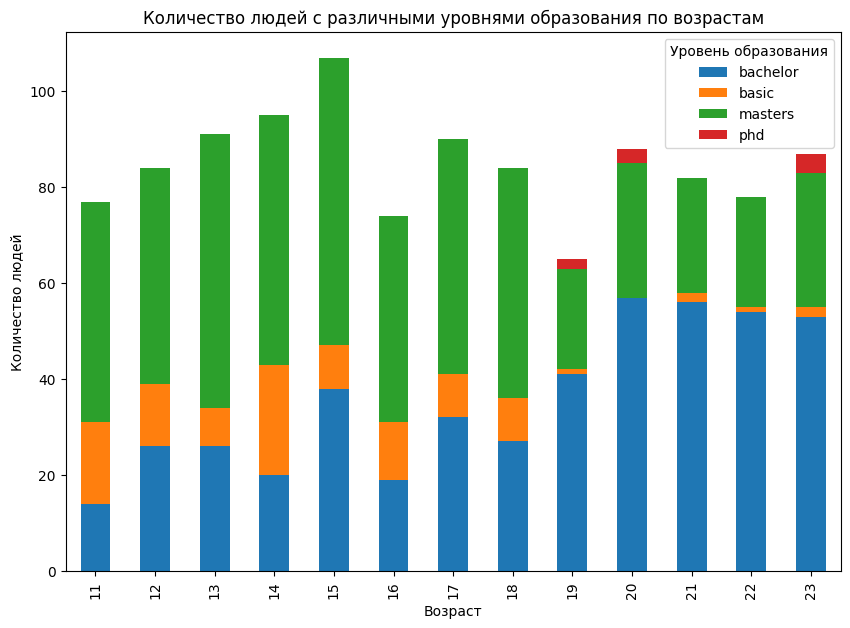

In [55]:
usd = usd[usd['age'] <= 23]
grouped = usd.groupby(['age', 'education']).size().unstack(fill_value=0)

# Построение гистограммы
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Количество людей с различными уровнями образования по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.legend(title='Уровень образования')
plt.show()

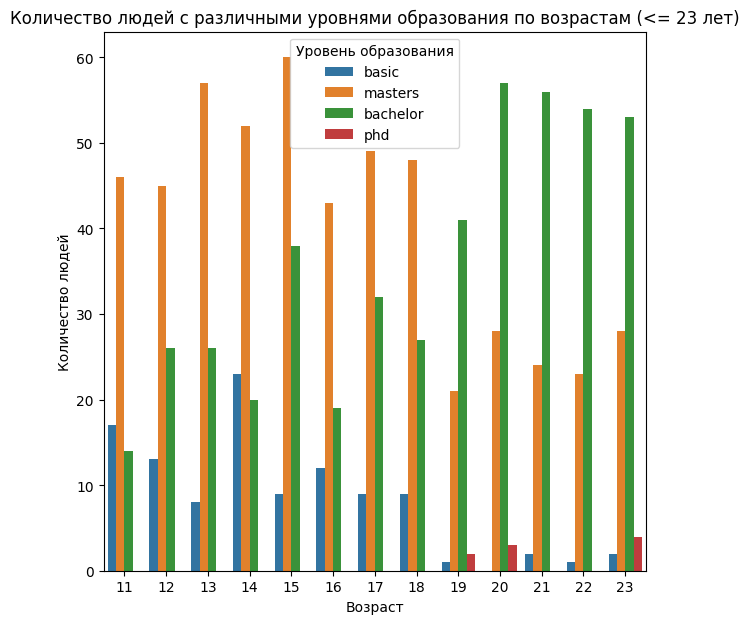

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = usd[usd['age'] <= 23]
plt.figure(figsize=(7, 7))
sns.countplot(data=df_filtered, x='age', hue='education')
plt.title('Количество людей с различными уровнями образования по возрастам (<= 23 лет)')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.legend(title='Уровень образования')
plt.show()

In [13]:

order_data = order
interaction_data = interact


avg_bill_per_user = order_data.groupby('userId')['avg_bill'].mean().reset_index()


merged_data = interaction_data.merge(avg_bill_per_user, left_on='UserId', right_on='userId', how='left')


merged_data.to_csv('/Users/iangustov_tsm/Desktop/dataton/interactiondata_with_avg_bill.csv', index=False)


merged_data

,UserId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,userId,avg_bill
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,0,0,0,0,0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,370.285714
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,1,1,0,1,0,3146a104-ede9-4cbb-8869-b65cf60a35d0,79.142857
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,0,0,0,0,0,191455cb-b4cc-4ef4-abf6-056349caf299,254.285714
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,0,0,1,1,1,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,236.714286
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,1,0,0,1,1,00c8adb8-4694-4137-a352-404bd16cd299,242.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,0,0,0,0,0,21210d57-efad-46cc-82d8-4efc2475b681,859.000000
3401,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,1,1,1,1,0,010fe525-912c-4b69-8eca-2e9c719c1f97,120.142857
3402,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,0,0,0,0,0,c29d31be-8100-40e2-b547-b925da7d9a5c,2.857143
3403,a0c31e08-22eb-4ca9-aeb8-9c0a37d7b224,0,2024-06-26,4,2,12,5,5,17,31,0,0,0,0,0,a0c31e08-22eb-4ca9-aeb8-9c0a37d7b224,841.000000


In [14]:
merged_data = merged_data.drop(columns=['userId'])

In [63]:
merged_data


,UserId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,avg_bill
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,0,0,0,0,0,370.285714
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,1,1,0,1,0,79.142857
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,0,0,0,0,0,254.285714
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,0,0,1,1,1,236.714286
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,1,0,0,1,1,242.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,0,0,0,0,0,859.000000
3401,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,1,1,1,1,0,120.142857
3402,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,0,0,0,0,0,2.857143
3403,a0c31e08-22eb-4ca9-aeb8-9c0a37d7b224,0,2024-06-26,4,2,12,5,5,17,31,0,0,0,0,0,841.000000


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
interact=pd.read_csv('/Users/iangustov_tsm/Desktop/dataton/interactiondata.csv')
interact



,Campaign,Total Outcome
2,marketing_company_outcome_3,15363
4,marketing_company_outcome_5,15329
3,marketing_company_outcome_4,14886
0,marketing_company_outcome_1,14718
1,marketing_company_outcome_2,11515


In [33]:
df_m=pd.read_csv('/Users/iangustov_tsm/Desktop/dataton/df_merge_all.csv')
df_m

,Unnamed: 0,userid,category,avg_bill,join_datetime,age,income,kids,teenagers,marital,...,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
1,1,2c6336a2-852b-48af-9150-9b9030387f5d,sweets,55.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
2,2,2c6336a2-852b-48af-9150-9b9030387f5d,vegetables,294.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
3,3,2c6336a2-852b-48af-9150-9b9030387f5d,meat,360.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
4,4,2c6336a2-852b-48af-9150-9b9030387f5d,other,275.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23830,23830,51773a75-1cd4-48b1-84d6-d56f9266a8ee,meat,90.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
23831,23831,51773a75-1cd4-48b1-84d6-d56f9266a8ee,other,21.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
23832,23832,51773a75-1cd4-48b1-84d6-d56f9266a8ee,sweets,108.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
23833,23833,51773a75-1cd4-48b1-84d6-d56f9266a8ee,fish,108.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1


In [38]:
df_m = df_m[df_m['category'] != 'alcohol']

In [39]:
df_m

,Unnamed: 0,userid,category,avg_bill,join_datetime,age,income,kids,teenagers,marital,...,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
1,1,2c6336a2-852b-48af-9150-9b9030387f5d,sweets,55.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
2,2,2c6336a2-852b-48af-9150-9b9030387f5d,vegetables,294.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
3,3,2c6336a2-852b-48af-9150-9b9030387f5d,meat,360.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
4,4,2c6336a2-852b-48af-9150-9b9030387f5d,other,275.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23829,23829,51773a75-1cd4-48b1-84d6-d56f9266a8ee,fruits,930.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
23830,23830,51773a75-1cd4-48b1-84d6-d56f9266a8ee,meat,90.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
23831,23831,51773a75-1cd4-48b1-84d6-d56f9266a8ee,other,21.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
23832,23832,51773a75-1cd4-48b1-84d6-d56f9266a8ee,sweets,108.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1


In [42]:
df_m = df_m[(df_m.select_dtypes(include=[float, int]) >= 0).all(axis=1)]

In [46]:
file_path = 'true_vamp.csv'
df_m.to_csv(file_path, index=False)